In [1]:
from matplotlib.patches import Patch

from google.colab import files
uploaded = files.upload()

Saving female-gs-med.xlsx to female-gs-med.xlsx
Saving male-gs-med.xlsx to male-gs-med.xlsx


In [4]:
from scipy.stats import shapiro
import pandas as pd

data = pd.read_excel("female-gs-med.xlsx")

columns_to_test = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

print(f"Female Gender-Specific:")

# Apply Shapiro-Wilk test to each column
for column in columns_to_test:
    stat, p = shapiro(data[column].dropna())
    print(f"\nShapiro-Wilk Test for {column}")
    print(f"  Statistic: {stat:.4f}, p-value: {p:.5f}")


Female Gender-Specific:

Shapiro-Wilk Test for FA-MED
  Statistic: 0.8869, p-value: 0.01147

Shapiro-Wilk Test for PU-MED
  Statistic: 0.7323, p-value: 0.00003

Shapiro-Wilk Test for AE-MED
  Statistic: 0.9043, p-value: 0.02663

Shapiro-Wilk Test for RW-MED
  Statistic: 0.9075, p-value: 0.03110


In [3]:
from scipy.stats import shapiro
import pandas as pd

data = pd.read_excel("male-gs-med.xlsx")

columns_to_test = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

print(f"Male Gender-Specific:")

# Apply Shapiro-Wilk test to each column
for column in columns_to_test:
    stat, p = shapiro(data[column].dropna())
    print(f"\nShapiro-Wilk Test for {column}")
    print(f"  Statistic: {stat:.4f}, p-value: {p:.5f}")


Male Gender-Specific:

Shapiro-Wilk Test for FA-MED
  Statistic: 0.8312, p-value: 0.00050

Shapiro-Wilk Test for PU-MED
  Statistic: 0.8354, p-value: 0.00060

Shapiro-Wilk Test for AE-MED
  Statistic: 0.8927, p-value: 0.00913

Shapiro-Wilk Test for RW-MED
  Statistic: 0.8709, p-value: 0.00307


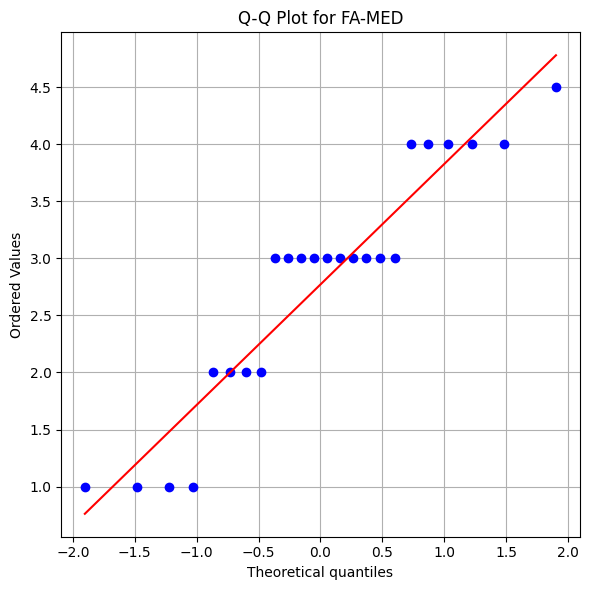

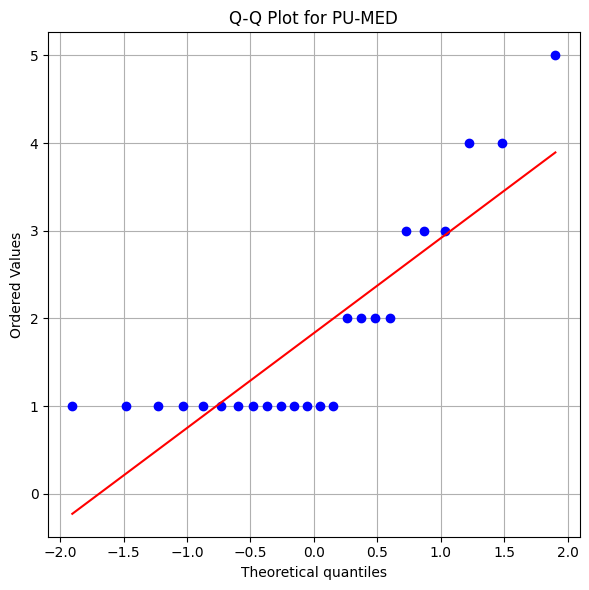

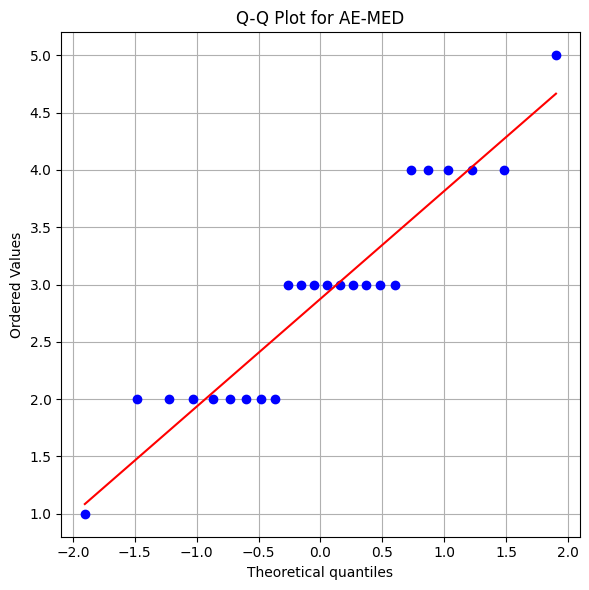

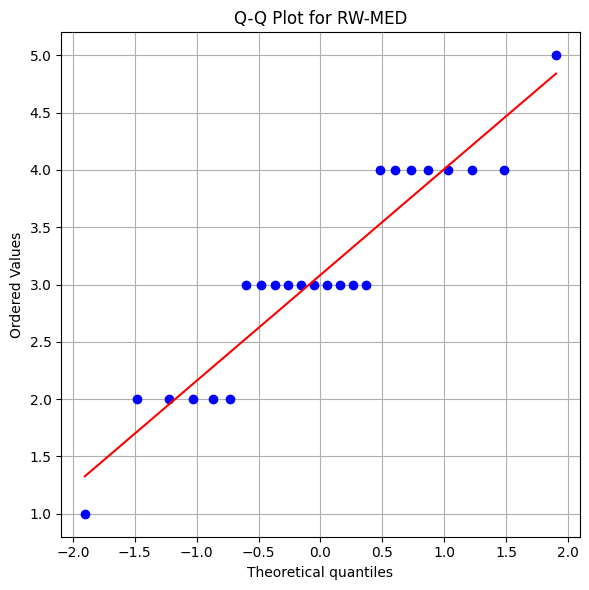

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_excel("female-gs-med.xlsx")

columns = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

for col in columns:
    data = df[col].dropna()
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


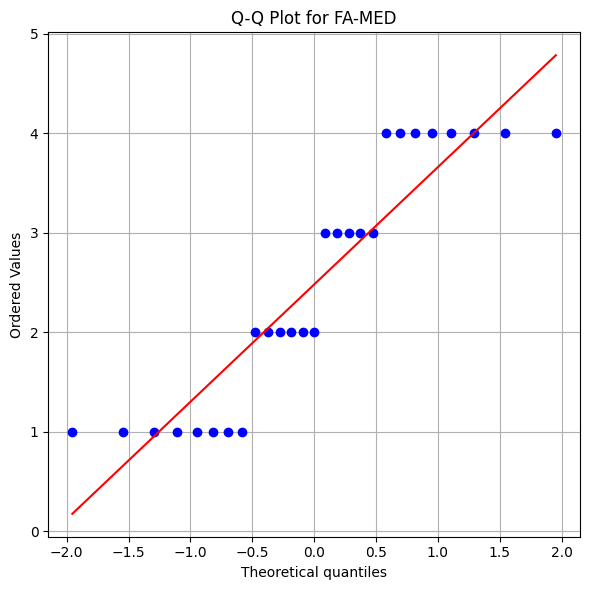

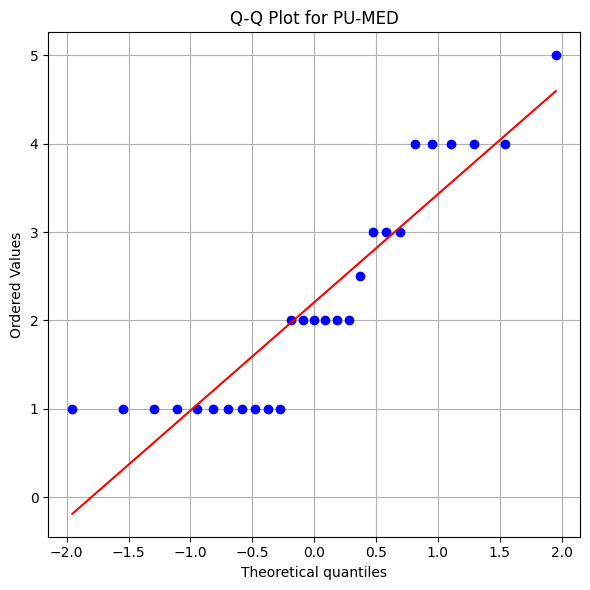

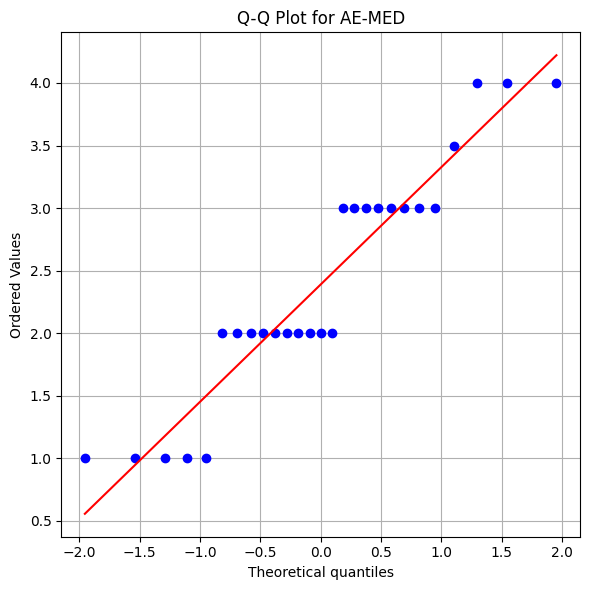

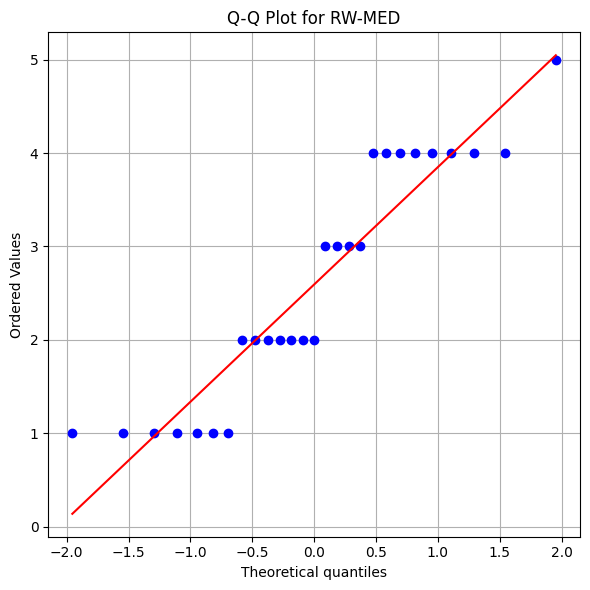

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_excel("male-gs-med.xlsx")

columns = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

for col in columns:
    data = df[col].dropna()
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Clean column names for all DataFrames
def clean_columns(df):
    df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
    return df

# Load and clean data
male_gs = clean_columns(pd.read_excel("male-gs-med.xlsx"))
female_gs = clean_columns(pd.read_excel("female-gs-med.xlsx"))


# Define dimension columns
# MED = median
dimensions = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

# Perform Mann-Whitney U test
print("Mann-Whitney U test Results (female vs. male):\n")
for dim in dimensions:
    male_values = male_gs[dim].dropna()
    female_values = female_gs[dim].dropna()

    stat, p = mannwhitneyu(male_values, female_values, alternative='two-sided')
    print(f"{dim}: U={stat:.2f}, p={p:.4f}\n")


Mann-Whitney U-Test Results (female vs. male):

FA-MED: U=281.00, p=0.4076

PU-MED: U=383.00, p=0.2368

AE-MED: U=240.00, p=0.0993

RW-MED: U=251.50, p=0.1605



/tmp/ipython-input-8-2505666779.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-2505666779.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-2505666779.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-2505666779.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)


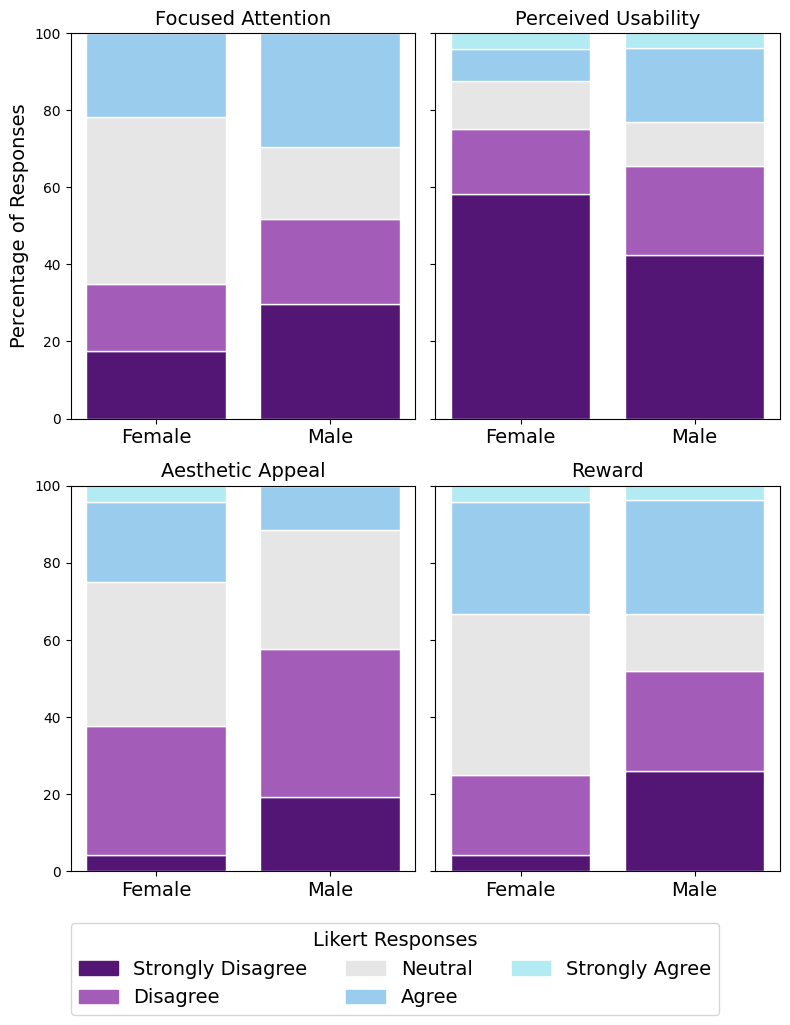

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load data
m_df = pd.read_excel("male-gs-med.xlsx")
f_df = pd.read_excel("female-gs-med.xlsx")

# Add group labels
m_df["Group"] = "Male"
f_df["Group"] = "Female"

# Combine datasets
combined_df = pd.concat([m_df, f_df], ignore_index=True)

# Dimensions and labels
dimensions = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']
dimension_labels = [
    'Focused Attention',
    'Perceived Usability',
    'Aesthetic Appeal',
    'Reward'
]

likert_map = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_map.values())

colors = {
    'Strongly Disagree': '#541675',
    'Disagree': '#a45cb9',
    'Neutral': '#e6e6e6',
    'Agree': '#99cced',
    'Strongly Agree': '#b3ebf2'
}

# Create subplots (2 rows × 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(8, 10), sharey=True)
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    ax = axes[i]

    # Map numeric Likert scores to text labels
    combined_df[f'{dim}_label'] = combined_df[dim].map(likert_map)

    # Create normalized crosstab
    ct = pd.crosstab(
        combined_df['Group'],
        combined_df[f'{dim}_label'],
        normalize='index'
    ) * 100

    # Ensure consistent Likert ordering
    ct = ct.reindex(columns=likert_order, fill_value=0)

    # Plot stacked bars
    bottom = [0] * len(ct)
    for response in likert_order:
        values = ct[response].values
        ax.bar(
            ct.index,
            values,
            bottom=bottom,
            label=response if i == 0 else "",
            color=colors[response],
            edgecolor='white'
        )
        bottom = [a + b for a, b in zip(bottom, values)]

    ax.set_title(dimension_labels[i], fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xticklabels(ct.index, fontsize=14)
    if i == 0:
        ax.set_ylabel("Percentage of Responses", fontsize=14)

response_patches = [Patch(color=colors[label], label=label) for label in likert_order]

# Add legend below all plots
fig.legend(
    handles=response_patches,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.03),
    ncol=3,
    frameon=True,
    fontsize=14,
    title="Likert Responses",
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()
